In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('train_ctrUa4K.csv')

data1=pd.read_csv('test_lAUu6dG.csv')

# preprocessing on Train dataset

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
fgraph=data.select_dtypes(include=['float'])

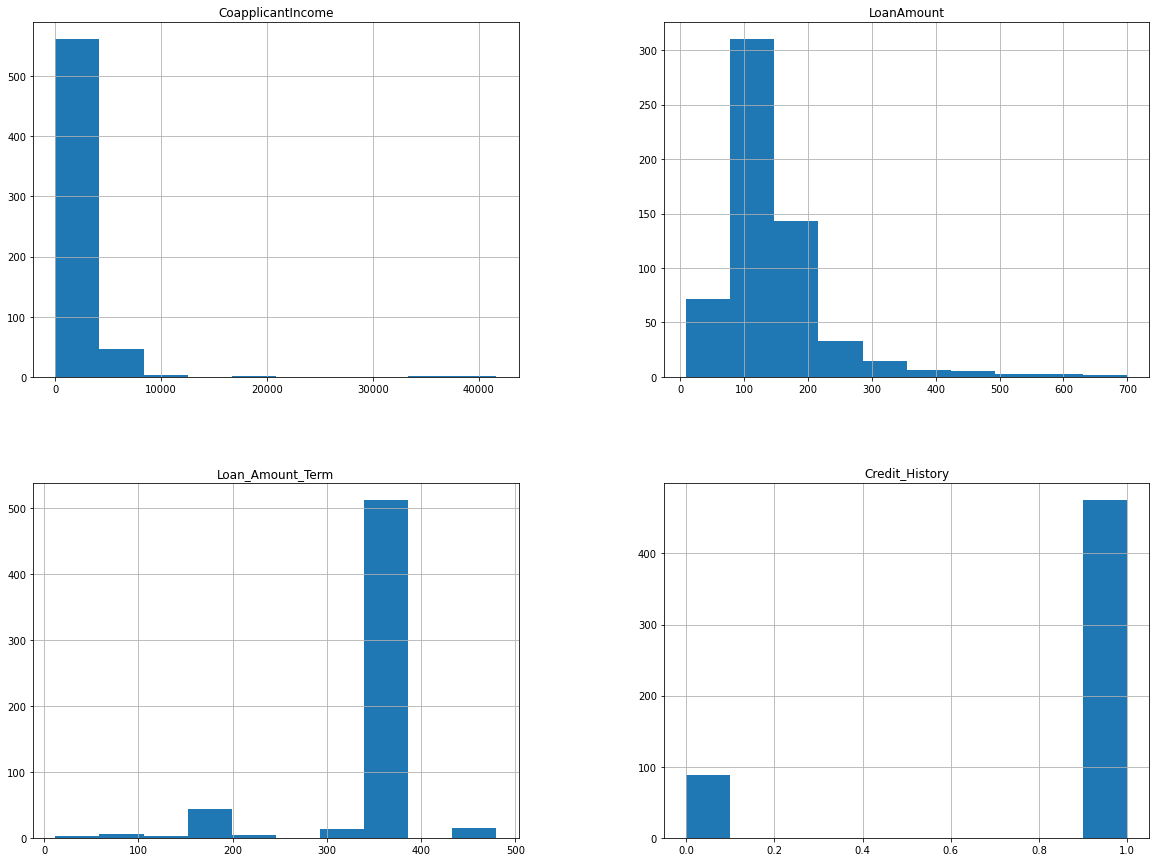

In [8]:
fgraph.hist(figsize=(20,15))
plt.show()

In [9]:
fgraph.columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [10]:
#filling null values of float types with median
for i in ['LoanAmount', 'Loan_Amount_Term',
       'Credit_History']:
    data[i]=data[i].fillna(data[i].median())

In [11]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [12]:
data=data.drop('Dependents' , axis=1)

In [13]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [14]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [15]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
data=data.drop('Loan_ID',axis=1)

In [17]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
#label encoding on train datset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [19]:
data['Gender'] = le.fit_transform(data['Gender'])

In [20]:
data['Married'] = le.fit_transform(data['Married'])

In [21]:
data['Education'] = le.fit_transform(data['Education'])

In [22]:
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])

In [23]:
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [24]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


# Preprocessing on Test dataset

In [25]:
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [26]:
ID=data1['Loan_ID']

In [27]:
data1.shape

(367, 12)

In [28]:
data1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [29]:
#filling null values with median
for i in ['LoanAmount', 'Loan_Amount_Term',
       'Credit_History']:
    data1[i]=data1[i].fillna(data1[i].median())

In [30]:
data1=data1.drop('Dependents' , axis=1)

In [31]:
data1=data1.drop('Loan_ID',axis=1)

In [32]:
data1['Gender'] = data1['Gender'].fillna(data1['Gender'].mode()[0])

In [33]:
data1['Married'] = data1['Married'].fillna(data1['Married'].mode()[0])

In [34]:
data1['Self_Employed'] = data1['Self_Employed'].fillna(data1['Self_Employed'].mode()[0])

In [35]:
data1.isna().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [36]:
#label Encoding 
data1['Gender'] = le.fit_transform(data1['Gender'])

In [37]:
data1['Married'] = le.fit_transform(data1['Married'])

In [38]:
data1['Education'] = le.fit_transform(data1['Education'])

In [39]:
data1['Self_Employed'] = le.fit_transform(data1['Self_Employed'])

In [40]:
data1['Property_Area'] = le.fit_transform(data1['Property_Area'])

In [41]:
data1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,1,0,3276,0,78.0,360.0,1.0,2


In [42]:
#appling minmax on test data
from sklearn.preprocessing import MinMaxScaler 

In [43]:
minmax=MinMaxScaler(feature_range=(0,1))
test_data=minmax.fit_transform(data1)

In [44]:
data1.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [45]:
test_data=pd.DataFrame(test_data,columns=['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'])

In [46]:
test_data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.0,0.0,0.078865,0.000000,0.157088,0.746835,1.0,1.0
1,1.0,1.0,0.0,0.0,0.042411,0.062500,0.187739,0.746835,1.0,1.0
2,1.0,1.0,0.0,0.0,0.068938,0.075000,0.344828,0.746835,1.0,1.0
3,1.0,1.0,0.0,0.0,0.032263,0.106083,0.137931,0.746835,1.0,1.0
4,1.0,0.0,1.0,0.0,0.045168,0.000000,0.095785,0.746835,1.0,1.0


# Modelling

In [47]:
#splitting X and Y
y=data['Loan_Status']
x=data.drop('Loan_Status',axis=1)

In [48]:
#appling minmax scaling on x
from sklearn.preprocessing import MinMaxScaler 

In [49]:
minmax=MinMaxScaler(feature_range=(0,1))
x1=minmax.fit_transform(x)

In [50]:
x.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [51]:
#coverting array into DataFrame
x1=pd.DataFrame(x1,columns=['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'])

In [52]:
x1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0
1,1.0,1.0,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0
2,1.0,1.0,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0
3,1.0,1.0,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0
4,1.0,0.0,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=42)

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
log=LogisticRegression()
model_log=log.fit(x_train,y_train)

In [57]:
y_pred=model_log.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [59]:
print(confusion_matrix(y_test,y_pred))

[[21 33]
 [ 2 98]]


In [60]:
print(accuracy_score(y_test,y_pred))

0.7727272727272727


# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
metric_k=[]
neighbors=np.arange(3,15)

for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors=k)
    model_knn=knn.fit(x_train,y_train)
    y_pred_knn=model_knn.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

In [63]:
metric_k

[0.7597402597402597,
 0.7272727272727273,
 0.7532467532467533,
 0.7402597402597403,
 0.7662337662337663,
 0.7402597402597403,
 0.7727272727272727,
 0.7727272727272727,
 0.7792207792207793,
 0.7792207792207793,
 0.7662337662337663,
 0.7727272727272727]

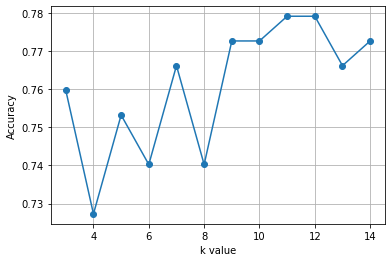

In [64]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [65]:
knn= KNeighborsClassifier(n_neighbors=11)
model_knn=knn.fit(x_train,y_train)
y_pred_knn=model_knn.predict(x_test)

In [66]:
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

[[22 32]
 [ 2 98]]
0.7792207792207793


# SVM

In [67]:
from sklearn.svm import SVC

kernel='rbf'

In [68]:
svm_clf=SVC(kernel='rbf')

In [69]:
svm_model=svm_clf.fit(x_train,y_train)

In [70]:
y_pred1=svm_clf.predict(x_test)

In [71]:
confusion_matrix(y_test,y_pred1)

array([[21, 33],
       [ 2, 98]], dtype=int64)

In [72]:
accuracy_score(y_test,y_pred1)

0.7727272727272727

kernel='poly'

In [73]:
svm_cl=SVC(kernel='poly')
svm_model1=svm_cl.fit(x_train,y_train)
y_pred=svm_cl.predict(x_test)

In [74]:
confusion_matrix(y_test,y_pred)

array([[21, 33],
       [ 2, 98]], dtype=int64)

In [75]:
accuracy_score(y_test,y_pred)

0.7727272727272727

# Decision Tree

In [76]:
from sklearn.tree import DecisionTreeClassifier


In [77]:
dt_clf=DecisionTreeClassifier(random_state=42)
model_dt=dt_clf.fit(x_train,y_train)
y_predd=model_dt.predict(x_test)

In [78]:
confusion_matrix(y_test,y_predd)

array([[25, 29],
       [23, 77]], dtype=int64)

In [79]:
accuracy_score(y_test,y_predd)

0.6623376623376623

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf_clf=RandomForestClassifier()
model_rf=rf_clf.fit(x_train,y_train)

In [82]:
y_predr=model_rf.predict(x_test)

In [83]:
confusion_matrix(y_test,y_predr)

array([[22, 32],
       [ 7, 93]], dtype=int64)

In [84]:
accuracy_score(y_test,y_predr)

0.7467532467532467

Accuracy Rates:
Logistic Regession = 0.772 ,
KNN                = 0.779 ,
SVM (rbf)          = 0.772 ,
SVM (poly)         = 0.772 ,
Decision Tree      = 0.662 ,
Random Forest      = 0.766

KNN is giving highest accuracy score


In [85]:
#loan status prediction on test data using KNN
ypred_test=model_knn.predict(test_data)

In [86]:
ypred_test=pd.DataFrame(ypred_test,columns=["Loan_Status"])

In [87]:
#reading sample submission dataset

In [88]:
submit=pd.read_csv('sample_submission_49d68Cx.csv')

In [89]:
submit.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [90]:
sub=submit.copy()

In [91]:
sub=pd.concat([ID,ypred_test],axis=1) #Concatinating sample_submission data set with predicted values

In [92]:
sub.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [93]:
sub.to_csv('Submissiondata.csv',index=False) #converting dataframe to csv

In [94]:
sub['Loan_Status'].value_counts()

Y    311
N     56
Name: Loan_Status, dtype: int64

In [95]:
result=pd.read_csv('Submissiondata.csv')

In [96]:
result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [97]:
#prediction using Random Forest

In [98]:
ypred_rf_test=model_rf.predict(test_data)

In [99]:
ypred_rf_test=pd.DataFrame(ypred_rf_test,columns=["Loan_Status"])

In [100]:
sub_rf=submit.copy()

In [101]:
sub_rf=pd.concat([ID,ypred_rf_test],axis=1)

In [102]:
sub_rf.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [103]:
sub_rf.to_csv('Submissiondata_2.csv',index=False)

In [104]:
sub_rf['Loan_Status'].value_counts()

Y    298
N     69
Name: Loan_Status, dtype: int64

In [105]:
#prediction Using Logistic Regression

In [106]:
ypred_log_test=model_log.predict(test_data)

In [107]:
ypred_log_test=pd.DataFrame(ypred_log_test,columns=["Loan_Status"])

In [108]:
sub_log=submit.copy()

In [109]:
sub_log=pd.concat([ID,ypred_log_test],axis=1)

In [110]:
sub_log.to_csv('Submissiondata_log1.csv',index=False)

In [111]:
sub_log['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [112]:
#prediction using SVM (rbf kernel)

In [113]:
ypred_rbf_test=svm_clf.predict(test_data)

In [114]:
ypred_rbf_test=pd.DataFrame(ypred_rbf_test,columns=["Loan_Status"])

In [115]:
sub_rbf=submit.copy()

In [116]:
sub_rbf=pd.concat([ID,ypred_rbf_test],axis=1)

In [117]:
sub_rbf.to_csv('Submissiondata_rbf.csv',index=False)

In [118]:
sub_rbf['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In Analytics Vidhya i got same score for Logistic Regression , Random Forest  and SVM (rbf).
